In [54]:
import librosa
import librosa.display
# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [56]:
from scipy import signal

# Item A

In [57]:
w, h = signal.freqz([1, -0.97], fs=100530.9648)

<Figure size 1440x504 with 0 Axes>

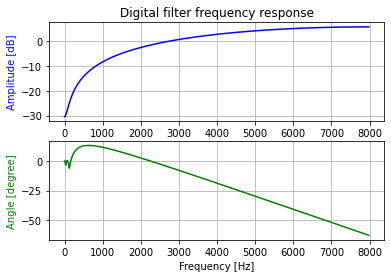

In [58]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20, 7))
fig, ax1 = plt.subplots(2)
ax1[0].set_title('Digital filter frequency response')

ax1[0].plot(w/6.2831853, 20 * np.log10(abs(h)), 'b')
ax1[0].set_ylabel('Amplitude [dB]', color='b')
ax1[0].set_xlabel('Frequency [Hz]')
ax1[0].grid(True)
ax1[0].axis('tight')

# ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h, deg=True))
ax1[1].plot(w/6.2831853, angles, 'g')
ax1[1].set_ylabel('Angle [degree]', color='g')
ax1[1].set_xlabel('Frequency [Hz]')
ax1[1].grid(True)
ax1[1].axis('tight')
plt.show()

# Item b

In [60]:
x, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/audio_ml/lista_2/enunciado_corr.wav', sr = 16000, mono = False)

In [61]:
x_fir = librosa.effects.preemphasis(x, coef=0.97)


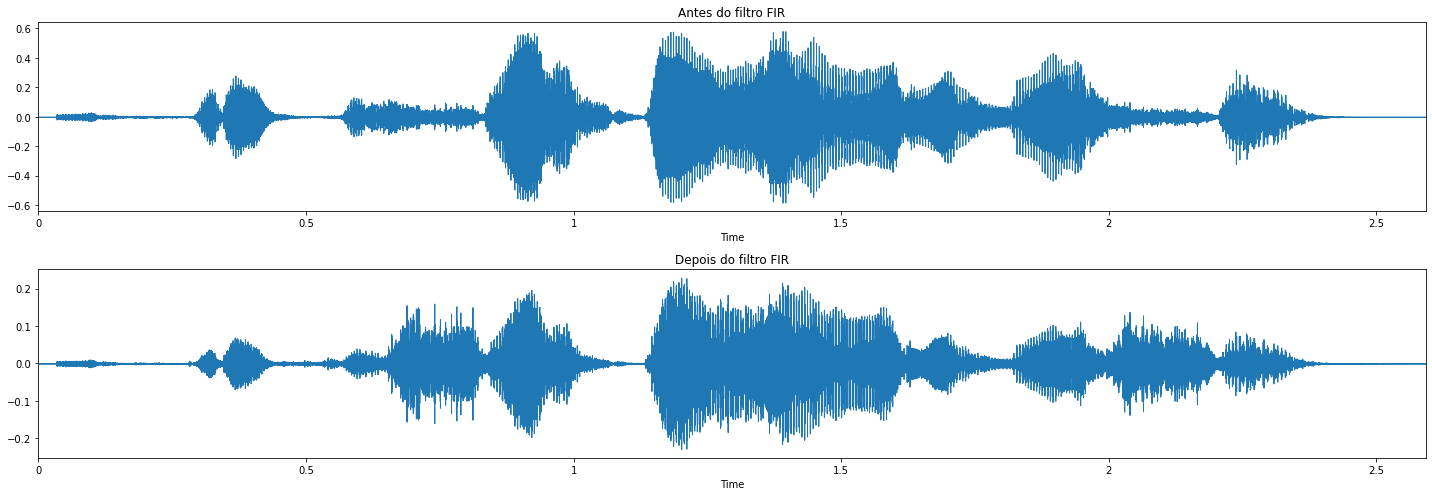

In [62]:
plt.figure(figsize=(20, 7))
plt.subplot(2, 1, 1)
librosa.display.waveplot(x, sr=sr)
plt.title('Antes do filtro FIR')

plt.subplot(2, 1, 2)
librosa.display.waveplot(x_fir, sr=sr)
plt.title('Depois do filtro FIR')
plt.tight_layout()
plt.show()

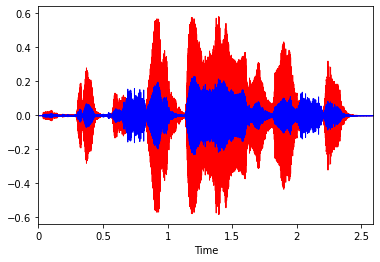

In [63]:
librosa.display.waveplot(x, sr, color = 'red')
librosa.display.waveplot(x_fir, sr, color = 'blue')

# Item c

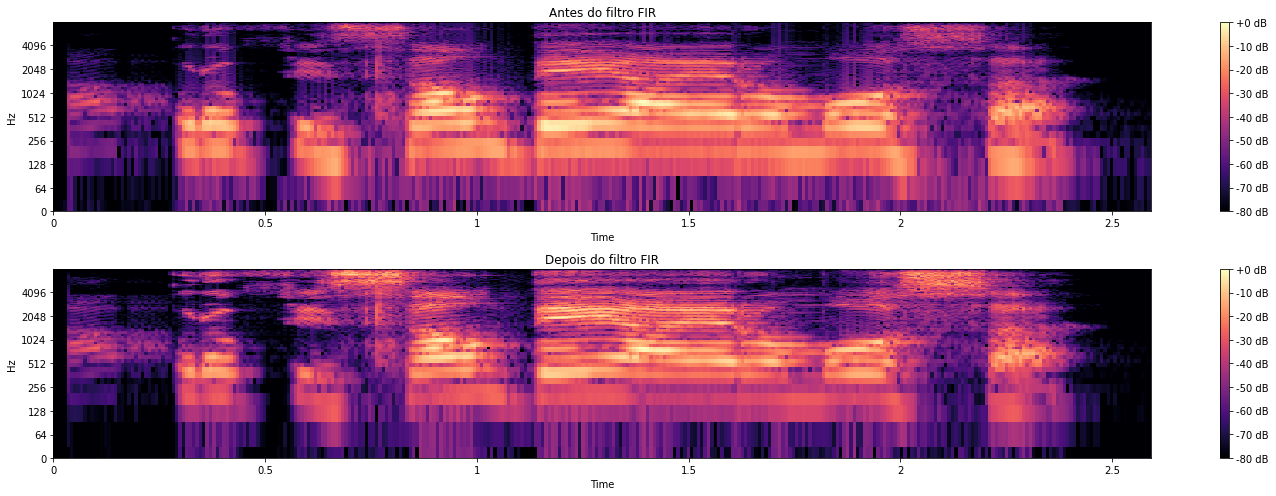

In [64]:
hop_length = 128
n_fft = 256
n_window = 256
X = librosa.stft(x, win_length = n_window, n_fft = n_fft, hop_length = hop_length, window = 'hamming')
X_fir = librosa.stft(x_fir, win_length = n_window, n_fft = n_fft, hop_length = hop_length, window = 'hamming')
D = librosa.amplitude_to_db(np.abs(X), ref=np.max)
D_fir = librosa.amplitude_to_db(np.abs(X_fir), ref=np.max)

plt.figure(figsize=(20, 7))
plt.subplot(2, 1, 1)
librosa.display.specshow(D, y_axis = 'log', x_axis='time', sr = sr,
                         hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Antes do filtro FIR')



plt.subplot(2, 1, 2)
librosa.display.specshow(D_fir, y_axis = 'log', x_axis='time', sr = sr,
                         hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Depois do filtro FIR')
plt.tight_layout()
plt.show()